Project Description
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?


Bussiness/Social:
    Our challege consists in guessing the reasons behind their leaving and to predict which valuable employees will leave next.

Steps to Follow for the Project: The dataset contains 35 features and 1470 samples
Below are the steps to follow for the project:

Import the required libraries and data.
Do the careful EDA analysis, preprocessing and feature engineering on the given data.
Build/Test multiple models on the same dataset.
Check underfitting/overfitting,  avoid underfitting or overfitting (bias/variance) , cross validation and all performance parameters(metrics) for all models depending on the problem type.
Try to achieve a model with good performance.
Select the best/final performing model and explain on what basis you have selected the particular model as a final model.
Do hyper parameter tuning on the final/best model or on all models.
Save the best model for production and convey on which basis you have chosen that model.
Make the documentation and write your findings in the same file i.e. ipynb

# Importing required Libraries and data

In [201]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import datasets,linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import warnings 
warnings.filterwarnings('ignore')
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
import joblib
from sklearn.model_selection import cross_validate,KFold,cross_val_score
from sklearn.metrics import  roc_curve, roc_auc_score
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier)

In [202]:
# Loading the dataset downloaded from kaggle
hr_dt=pd.read_csv('HR.csv')
hr_dt.head(25)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [203]:
hr_dt.shape

(1470, 35)

In [204]:
hr_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [205]:
# groupby column data types
hr_dt.columns.groupby(hr_dt.dtypes)

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

In [206]:
# number of columns of a particular data type
print("No of columns for {} is {}.".format(list(hr_dt.columns.groupby(hr_dt.dtypes).keys())[0], len(hr_dt.columns.groupby(hr_dt.dtypes)[list(hr_dt.columns.groupby(hr_dt.dtypes).keys())[0]])))
print("No of columns for {} is {}.".format(list(hr_dt.columns.groupby(hr_dt.dtypes).keys())[1], len(hr_dt.columns.groupby(hr_dt.dtypes)[list(hr_dt.columns.groupby(hr_dt.dtypes).keys())[1]])))

No of columns for int64 is 26.
No of columns for object is 9.


# 2: Data Cleaning and Transfroming (Exploratory Data Analysis)

In [207]:
# Checking for null values
hr_dt.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

We can infer that there is no missing values from both training and testing dataset and the dataset is appropriate for the prediction

In [208]:
 hr_dt.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [209]:
hr_dt['Attrition'] = hr_dt['Attrition'].apply(lambda row: 1 if row == 'Yes' else 0)

In [210]:
hr_dt['Gender'] = hr_dt['Gender'].apply(lambda row: 1 if row == 'Male' else 0)

In [211]:
hr_dt['Over18'] = hr_dt['Over18'].apply(lambda row: 1 if row == 'Y' else 0)

In [212]:
hr_dt['OverTime'] = hr_dt['OverTime'].apply(lambda row: 1 if row == 'Yes' else 0)

In [213]:
# Converting BusinessTravel to Integer
embs = {'Travel_Rarely':0, 'Travel_Frequently':1, 'Non-Travel':2}
hr_dt['BusinessTravel'] = hr_dt['BusinessTravel'].map(embs)

In [214]:
# Converting marital to Department
emb_d = {'Sales':0, 'Research & Development':1, 'Human Resources':2}
hr_dt['Department'] = hr_dt['Department'].map(emb_d)

In [215]:
# Converting EducationField to Integer
emb_d = {'Life Sciences':0, 'Other':1, 'Medical':2,'Marketing':3,'Technical Degree':4,'Human Resources':5}
hr_dt['EducationField'] = hr_dt['EducationField'].map(emb_d)

In [216]:
# ConvertingJobRole to Integer
emb_d = {'Sales Executive':0, 'Research Scientist':1, 'Laboratory Technician':2,'Manufacturing Director':3,'Healthcare Representative':4,'Manager':5,'Sales Representative':6,'Research Director':7,'Human Resources':8}
hr_dt['JobRole'] = hr_dt['JobRole'].map(emb_d)

In [217]:
# Converting MaritalStatus to Integer
emb_d = {'Single':0, 'Married':1, 'Divorced':2}
hr_dt['MaritalStatus'] = hr_dt['MaritalStatus'].map(emb_d)

In [218]:
hr_dt.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,1102,0,1,2,0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,0,1373,1,2,2,1,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,0,591,1,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,0,1,1005,1,2,2,0,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,0,0,1324,1,3,3,2,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,0,0,1358,1,24,1,0,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,0,1,216,1,23,3,0,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,0,0,1299,1,27,3,2,1,13,...,2,80,2,17,3,2,7,7,7,7


In [219]:
# Checking for data type after converting each features ti numerical values
hr_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

In [220]:
hr_dt.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,0.392517,802.485714,0.739456,9.192517,2.912925,1.462585,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.431780,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.000000,465.000000,0.000000,2.000000,2.000000,0.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,0.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1.000000,1157.000000,1.000000,14.000000,4.000000,2.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Univarite Analysis

In [221]:
# Determine the unique values for each region
attrition_rate = hr_dt["Attrition"].value_counts()
attrition_rate

0    1233
1     237
Name: Attrition, dtype: int64

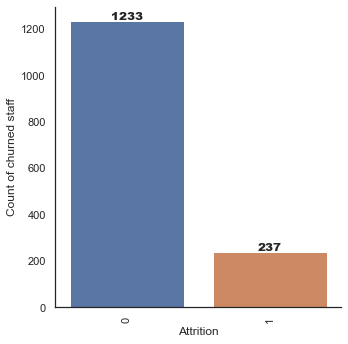

In [222]:
#labels = ['Not subscribd :0','subscribed:1']
sns.catplot(x = 'Attrition', data = hr_dt , kind = 'count',margin_titles =False) # plotting the survival rate
for index,value in enumerate(hr_dt["Attrition"].value_counts()):
    plt.text(index,value,value, ha="center", va="bottom",fontweight="black")
    #plt.xlabel(labels)
    plt.ylabel("Count of churned staff")
    #plt.bar(Status,Width = 0.5)
    plt.xticks(rotation = 90)

We still have 1233 staff still working and 237 staff that have churned.

                           Target Variable Distribution                          


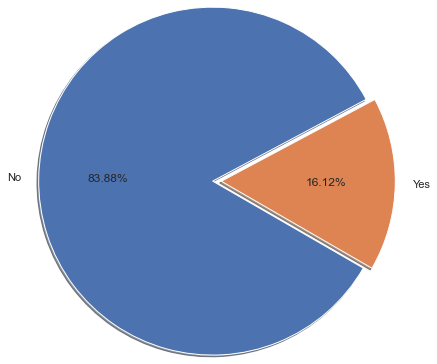

In [223]:
labels = ['No','Yes']
explode=np.zeros(len(labels))
explode[-1]=0.1
# Representing the pie chart using Pie Chart
print('\033[1mTarget Variable Distribution'.center(85))
plt.pie(hr_dt['Attrition'].value_counts(), labels=labels, counterclock=False, shadow=True,explode=explode, autopct='%1.2f%%', radius=2, startangle=-30)
plt.show()

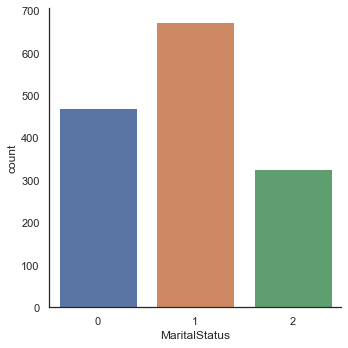

In [224]:
#Analysis of Marital Status
sns.set(style="white")
sns.catplot(x = 'MaritalStatus', data = hr_dt , kind = 'count',margin_titles =False,label=labels)
#labels = 'Single:0', 'Married:1', 'Divorced:2'

In [225]:
# It can be deduced that we have more Married worker than sinle and divorced

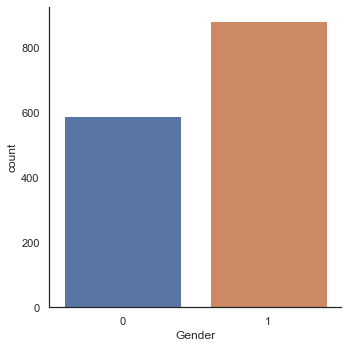

In [226]:
#Analysis of Marital Status
sns.set(style="white")
sns.catplot(x = 'Gender', data = hr_dt , kind = 'count',margin_titles =False,label=labels)
#labels = 'Single:0', 'Married:1', 'Divorced:2'

In [227]:
# It can be deduced that we have more male worker than female worker

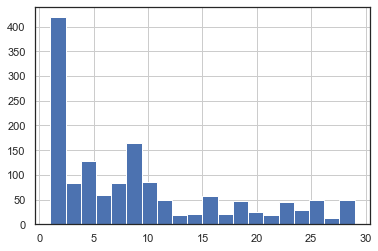

In [228]:
# Diffirent age categories for the titanic passengers
hist = hr_dt['DistanceFromHome'].hist(bins=20)

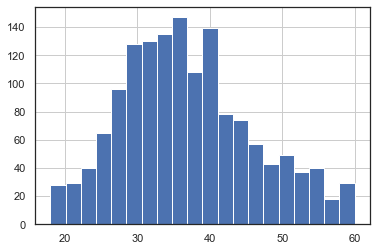

In [229]:
# Diffirent age categories for the titanic passengers
hist = hr_dt['Age'].hist(bins=20)

In [230]:
hr_dt.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Bivarite Analysis

In [231]:
# function to Visualizing Categorical values using Box plot
def features_plot(Categorical_column):
    plt.figure(figsize=(10,10))
    plt.subplot(2,1,1)
    col_name=[ 'Department', 'Education','Gender','MaritalStatus','JobRole','JobLevel']
    sns.countplot(x=Categorical_column,hue='Attrition', data=hr_dt)
    plt.title(f"{Categorical_column.title()} vs Attrition",fontweight="black",size=25,pad=10,)
    plt.legend(title='subscribed', loc='upper right', labels=['No', 'Yes'])
    col_values = hr_dt[Categorical_column].value_counts()
    plt.tight_layout()

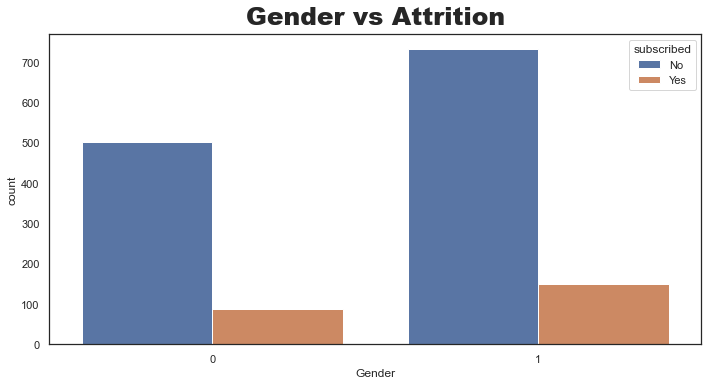

In [232]:
features_plot('Gender')
# 'Male':0,'Female':1

We can deduced that more female are leaving the job than the male counterpart

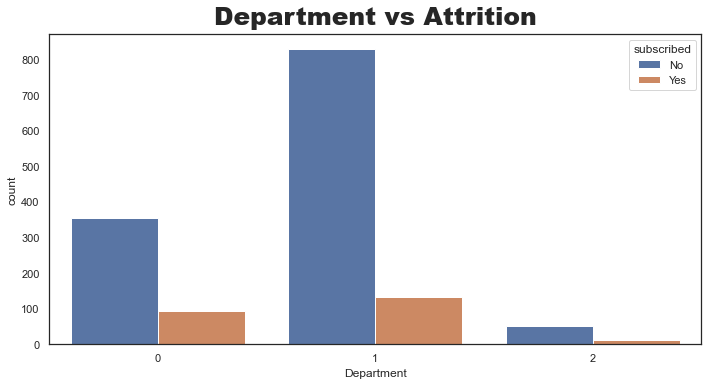

In [233]:
features_plot('Department')
#'Sales':0, 'Research & Development':1, 'Human Resources':2

We can deduced that staff from Research and Development are leaving the company more than other department.

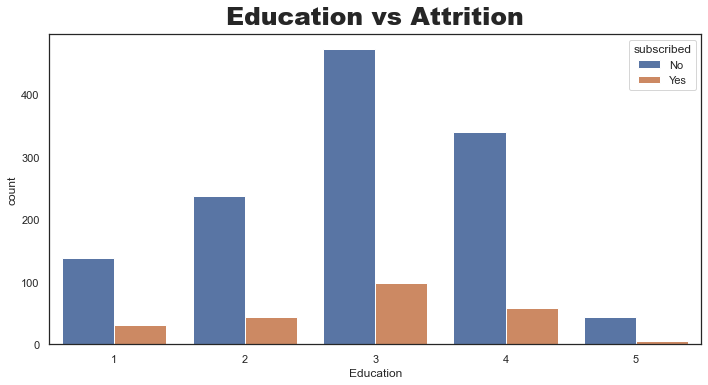

In [234]:
features_plot('Education')


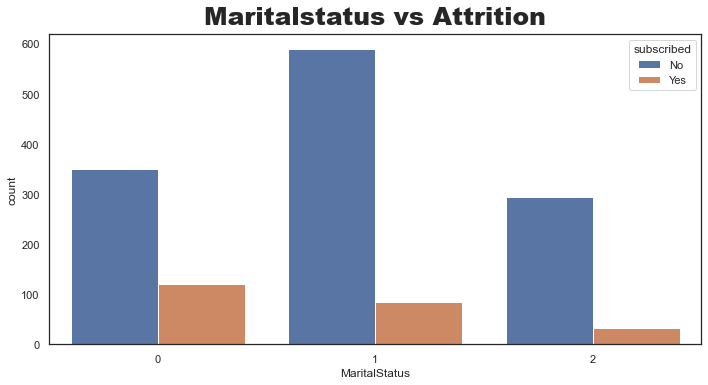

In [235]:
features_plot('MaritalStatus')
#'Single:0', 'Married:1', 'Divorced:2'

We can deduced that Single people are leaving the company more than married and Divorced

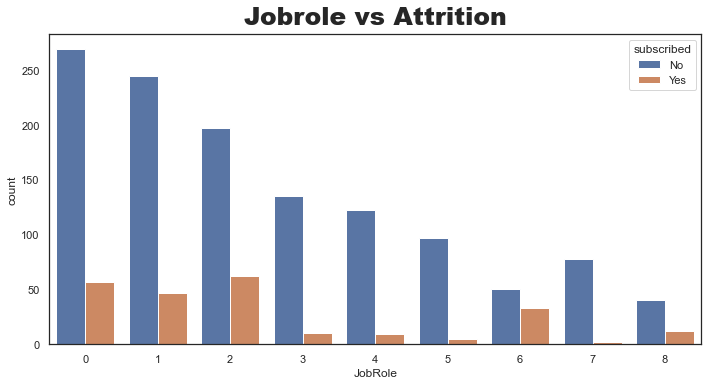

In [236]:
features_plot('JobRole')


We can deduced that Job Role 0,1 and 2 are leaving the company more than othe job roles

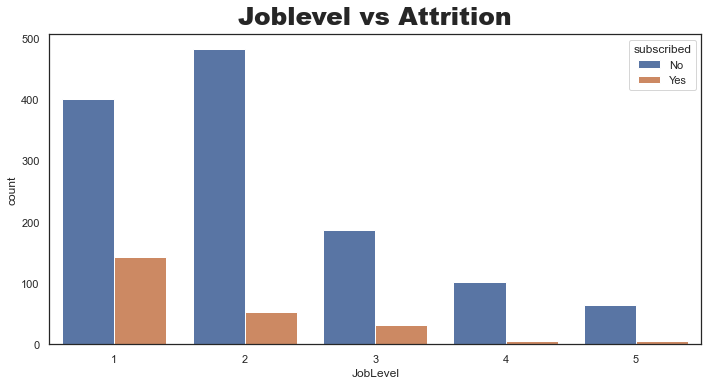

In [237]:
features_plot('JobLevel')


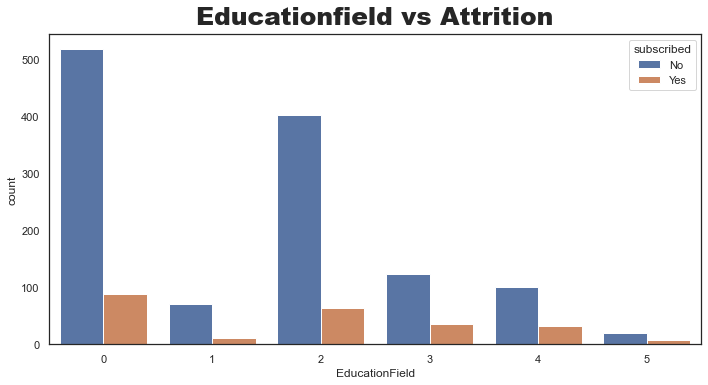

In [238]:
features_plot('EducationField')
#'Life Sciences':0, 'Other':1, 'Medical':2,'Marketing':3,'Technical Degree':4,'Human Resources':5

We can deduced that people that studied Life Sciences,Medical and marketing are leaving the compaany

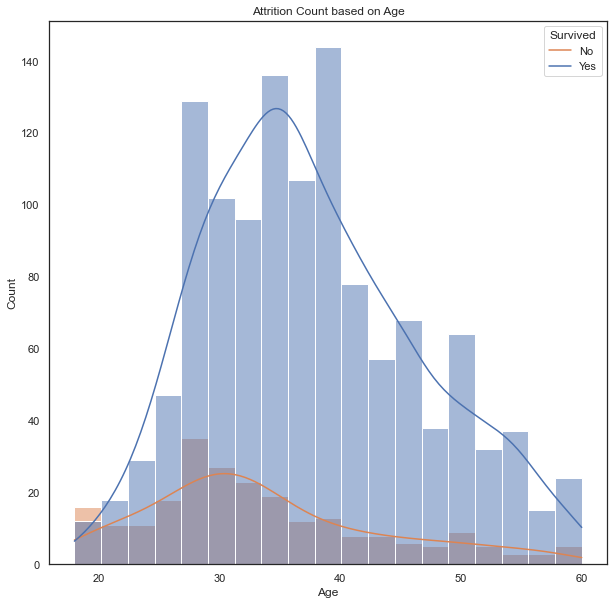

In [239]:
# Visualizing survival based on socio-economic status (age)
plt.figure(figsize=(10, 10))
sns.histplot(x='Age', hue='Attrition', data=hr_dt, kde=True)
plt.title('Attrition Count based on Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

# Multivarite Analyses

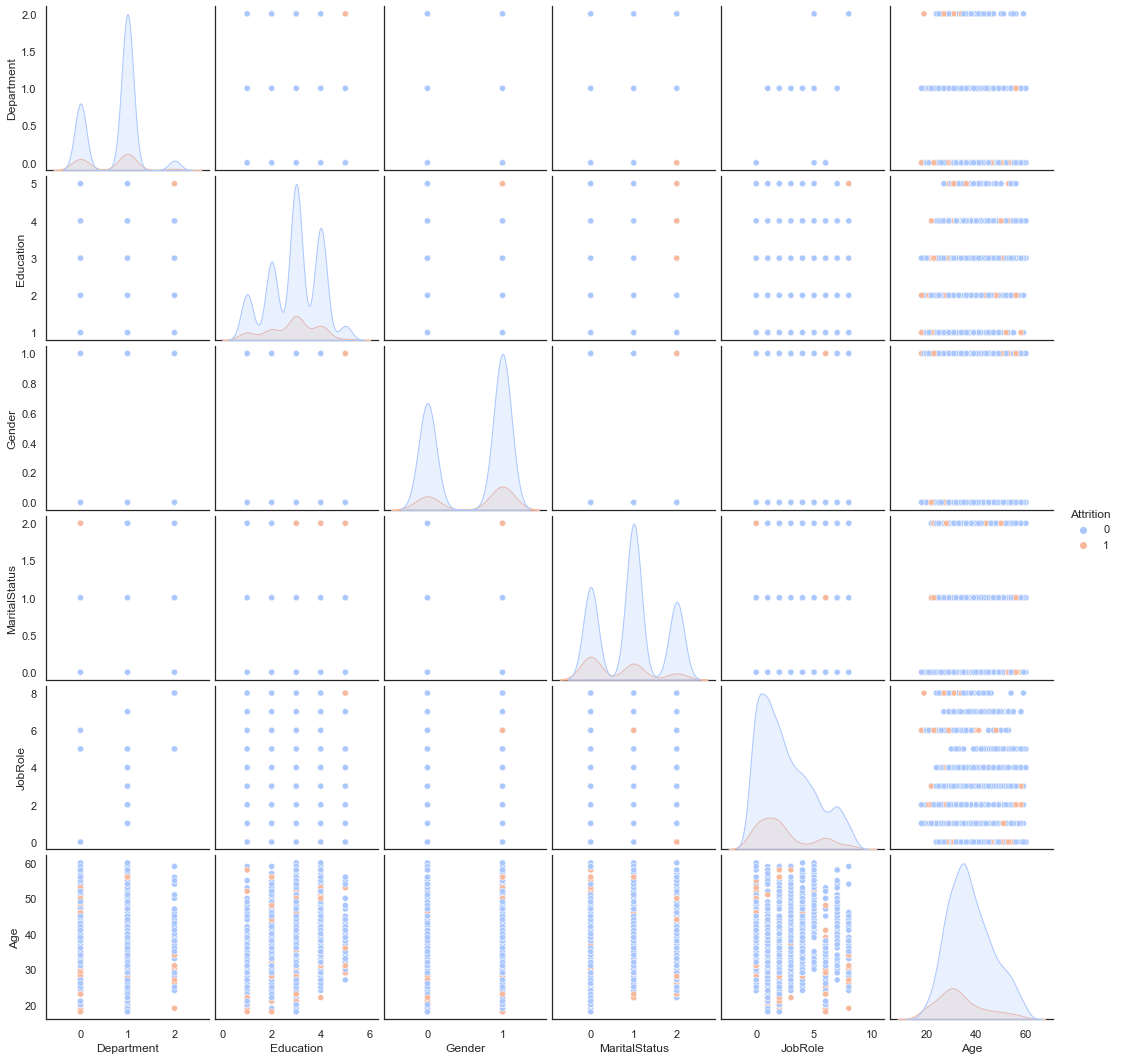

In [240]:
#Pairplot of all numerical variables
sns.pairplot(hr_dt, vars=['Department', 'Education','Gender','MaritalStatus','JobRole','Age'],hue='Attrition',palette="coolwarm")
plt.show()

# Feature Selection/Extraction- to identify the most relevant features

<AxesSubplot:>

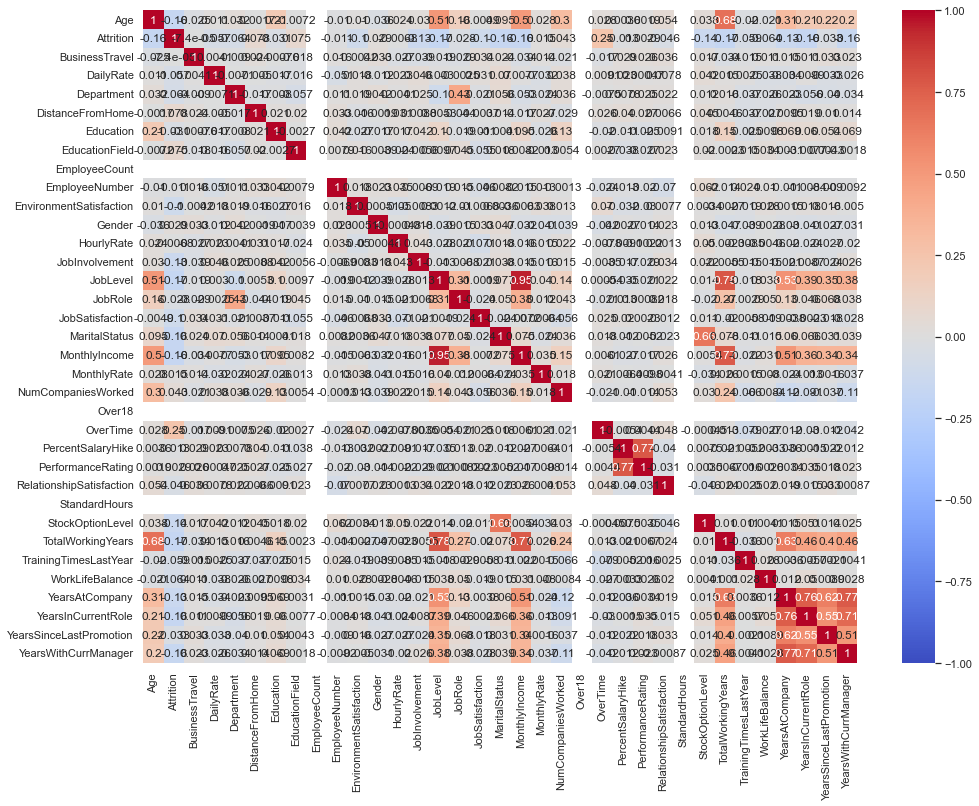

In [241]:
# Having a look at the correlation matrix
plt.figure(figsize=(16,12))
mask = np.zeros_like(hr_dt.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=hr_dt.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

It can be deduced that features such as Monthlyincome,Education,Joblevel, Jobrole,NumCompaniesWorked,TotalWorkingYears,DistanceFromHome are positively or negatively correlated with Attirtion

In [242]:
# Checking for Outliers
# Checking for skewness of the data to determine outliers
hr_dt.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel              1.439006
DailyRate                  -0.003519
Department                 -0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.487091
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                     0.770149
JobSatisfaction            -0.329672
MaritalStatus               0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

In [243]:
# From the record, their is zero or less outliers

# Data Preprocessing

In [244]:
# Separating feature data and Label data
# remove the target and redundant features from the dataset
X = hr_dt.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18','OverTime'], axis=1)
y= hr_dt['Attrition']

In [245]:
# Standardizing the dataset for X
from sklearn.preprocessing import StandardScaler
stdscalar= StandardScaler()
X_Scalar= stdscalar.fit_transform(X)

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X_Scalar, y, test_size = 0.20,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1176, 29), (294, 29), (1176,), (294,))

# Predictive Modelling using various algorithms

In [247]:
#Using Logistic Regression to  train a logistic regression model on the training set

hr_lreg = LogisticRegression(solver='liblinear')
hr_lreg.fit(X_train, y_train)
# Predicting the data model
lreg_pred = hr_lreg.predict(X_test) # Predicting the model
lreg_pred.shape

(294,)

In [248]:
#Accuracy and various Metrics for the model
LR_testing=round(accuracy_score(y_test, lreg_pred)*100,2)
LR_mae=mean_absolute_error(lreg_pred,y_test)
LR_mse=mean_squared_error(lreg_pred,y_test)
LR_rmse=np.sqrt(mean_squared_error(lreg_pred,y_test))
LR_r2=r2_score(y_test,lreg_pred)
print('Mean absolute error  =>',LR_mae)
print('Mean squared error  =>',LR_mse)
print('Root Mean squared error  =>',LR_rmse)
print('R2 Score  =>',LR_r2)
print("Accuracy Score of Testing Data is =>",LR_testing)

Mean absolute error  => 0.11224489795918367
Mean squared error  => 0.11224489795918367
Root Mean squared error  => 0.33502969713024494
R2 Score  => 0.024434389140271406
Accuracy Score of Testing Data is => 88.78


In [249]:
# Using RandomForestClassifier to train the dataset
clf = RandomForestClassifier(n_estimators = 1200, max_depth = 50 ,max_features = 3, bootstrap = True, random_state = 18)
clf.fit(X_train, y_train) # Fitting the model
clf_pred = clf.predict(X_test) # Predicting the model
clf_pred.shape

(294,)

In [250]:
#Accuracy and various Metrics for the model
clf_testing=round(accuracy_score(y_test, clf_pred)*100,2)
clf_mae=mean_absolute_error(clf_pred,y_test)
clf_mse=mean_squared_error(clf_pred,y_test)
clf_rmse=np.sqrt(mean_squared_error(clf_pred,y_test))
clf_r2=r2_score(y_test,clf_pred)
print('Mean absolute error  =>',clf_mae)
print('Mean squared error  =>',clf_mse)
print('Root Mean squared error  =>',clf_rmse)
print('R2 Score  =>',clf_r2)
print("Accuracy Score of Testing Data is =>",clf_testing)

Mean absolute error  => 0.12585034013605442
Mean squared error  => 0.12585034013605442
Root Mean squared error  => 0.35475391489884145
R2 Score  => -0.0938159879336351
Accuracy Score of Testing Data is => 87.41


In [251]:
# Fit model on the Daatset
DT=tree.DecisionTreeClassifier(criterion='entropy',max_depth=9, max_features='sqrt',min_samples_leaf=7, random_state=42, splitter='random')
DT.fit(X_train,y_train) # Fit model on the Daatset
DT_pred=DT.predict(X_test) # Predicting the model
DT_pred.shape

(294,)

In [252]:
#Accuracy and various Metrics for the model
DT_testing=round(accuracy_score(y_test, DT_pred)*100,2)
DT_mae=mean_absolute_error(DT_pred,y_test)
DT_mse=mean_squared_error(DT_pred,y_test)
DT_rmse=np.sqrt(mean_squared_error(DT_pred,y_test))
DT_r2=r2_score(y_test,DT_pred)
print('Mean absolute error  =>',DT_mae)
print('Mean squared error  =>',DT_mse)
print('Root Mean squared error  =>',DT_rmse)
print('R2 Score  =>',DT_r2)
print("Accuracy Score of Testing Data is =>",DT_testing)

Mean absolute error  => 0.12244897959183673
Mean squared error  => 0.12244897959183673
Root Mean squared error  => 0.3499271061118826
R2 Score  => -0.06425339366515836
Accuracy Score of Testing Data is => 87.76


In [253]:
# Using Extra Tree Classifier
# Using ExtraTrees Classifier
et =ExtraTreesClassifier(n_estimators=100) 
et.fit(X_train,y_train)
et_pred=et.predict(X_test)
et_pred.shape

(294,)

In [254]:
#Accuracy and various Metrics for the model
et_testing=round(accuracy_score(y_test, et_pred)*100,2)
et_mae=mean_absolute_error(et_pred,y_test)
et_mse=mean_squared_error(et_pred,y_test)
et_rmse=np.sqrt(mean_squared_error(et_pred,y_test))
et_r2=r2_score(y_test,et_pred)
print('Mean absolute error  =>',et_mae)
print('Mean squared error  =>',et_mse)
print('Root Mean squared error  =>',et_rmse)
print('R2 Score  =>',et_r2)
print("Accuracy Score of Testing Data is =>",et_testing)

Mean absolute error  => 0.12244897959183673
Mean squared error  => 0.12244897959183673
Root Mean squared error  => 0.3499271061118826
R2 Score  => -0.06425339366515836
Accuracy Score of Testing Data is => 87.76


In [255]:
 #Support Vector Machine
from sklearn.svm import SVR
svm=SVR(kernel='rbf')
svm.fit(X_train,y_train)
#Predicting the test set result
y_pred_svm=svm.predict(X_test)
y_pred_svm.shape

(294,)

In [256]:
#Accuracy and various Metrics for the model
svm_testing=round(svm.score(X_train, y_train)*100,2)
svm_mae=mean_absolute_error(y_pred_svm,y_test)
svm_mse=mean_squared_error(y_pred_svm,y_test)
svm_rmse=np.sqrt(mean_squared_error(y_pred_svm,y_test))
svm_r2=r2_score(y_test,y_pred_svm)*100
print('Mean absolute error  =>',svm_mae)
print('Mean squared error  =>',svm_mse)
print('Root Mean squared error  =>',svm_rmse)
print('R2 Score  =>',svm_r2)
print("Accuracy Score of Testing Data is =>",svm_testing)

Mean absolute error  => 0.22313686982835396
Mean squared error  => 0.10804120947965876
Root Mean squared error  => 0.3286962267499564
R2 Score  => 6.097033860394319
Accuracy Score of Testing Data is => 71.48


# Comparing the Models

In [257]:
# Results
models_metrics = pd.DataFrame([
    ["Logistic Regression Model", LR_testing, LR_mse],
    ["Decison tree Classifier",DT_testing, DT_mse],
    ["Extra Tree Classifier", et_testing, et_mse],
    ["Random Forest Classifier", clf_testing, clf_mse],
    ["Support Vector Machine",svm_testing, svm_mse]
])
models_metrics.columns= ["Model","Accuracy","MSE"]
models_metrics.set_index("Model")
models_metrics

,Model,Accuracy,MSE
0,Logistic Regression Model,88.78,0.112245
1,Decison tree Classifier,87.76,0.122449
2,Extra Tree Classifier,87.76,0.122449
3,Random Forest Classifier,87.41,0.125850
4,Support Vector Machine,71.48,0.108041


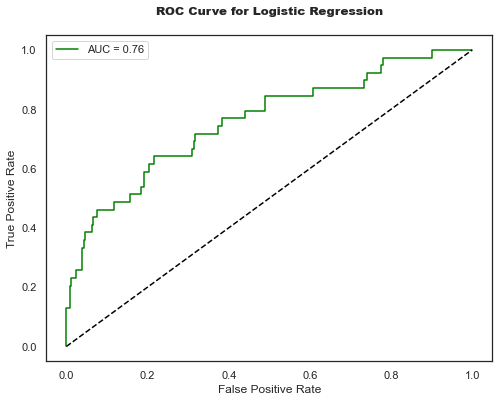

In [258]:
#ROC Curve and Area Under the Curve (AUC) for Logistic Regression
y_pred_proba = hr_lreg.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression",pad=20,fontweight="black")
plt.legend()
plt.show()

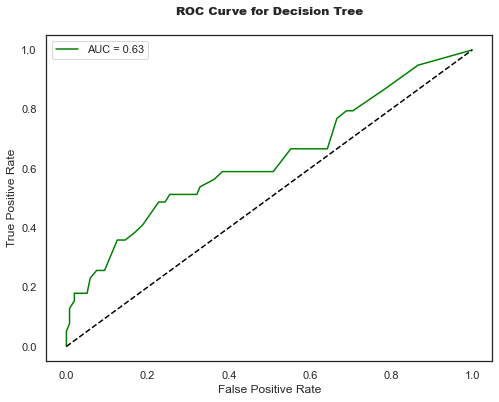

In [259]:
#ROC Curve and Area Under the Curve (AUC) for Decision Tree
y_pred_proba = DT.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Tree",pad=20,fontweight="black")
plt.legend()
plt.show()

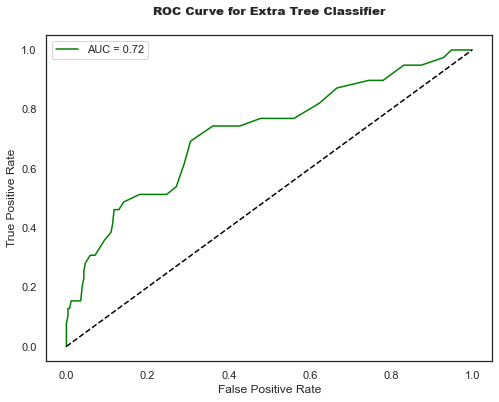

In [260]:
#ROC Curve and Area Under the Curve (AUC) for Extra Tree Classifier
y_pred_proba = et.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Extra Tree Classifier",pad=20,fontweight="black")
plt.legend()
plt.show()

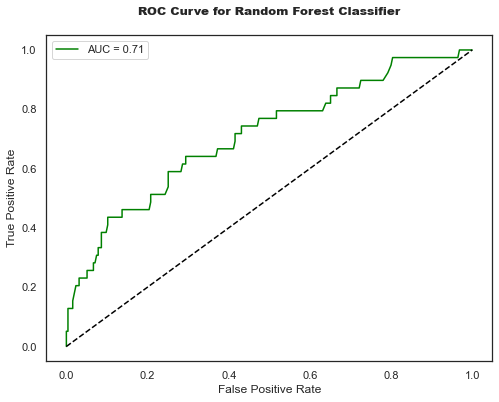

In [261]:
#ROC Curve and Area Under the Curve (AUC) for Random Forest Classifier
y_pred_proba = clf.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest Classifier",pad=20,fontweight="black")
plt.legend()
plt.show()

Out of the  models used for the evaluation, Logistic regression, Decision tree Classifer, random Forest classifier and Extra tree classifier achieved an average score near to 75% on the training data and alos AOC value greater than 70%  indicating a good fit to the training instances.
I picked Logistic regression as the best model with AUC of 0.76% and it will be fine tuned

In [262]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, X,y):
    rmse =- (cross_val_score(model, X,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LogisticRegression(solver='liblinear'),
          RandomForestClassifier(),
          DecisionTreeClassifier(),
         ExtraTreesClassifier(n_estimators=100),
         SVR(kernel='rbf')]
          
          
names = ['LR', 'RF', 'DT','ET','SVR']
          
for model,name in zip(models,names):
          score = rmse_cv(model,X,y)
          print("{}  : {:.4f}, {:4f}".format(name,score.mean()*100,score.std()*100))

LR  : 15.1020, 0.999792
RF  : 15.3741, 1.367330
DT  : 23.6054, 3.277330
ET  : 15.1020, 1.387488
SVR  : 13.8973, 1.855159


In [263]:
# Fine tunnning using Logistic model as the baseline
kfold = KFold(n_splits=8, random_state=0, shuffle=True)
modelCV = LogisticRegression(solver='liblinear', random_state=0)
scoring = 'roc_auc'
results = cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print(results, "\n")
print("Average AUC score = {:1.4f}; standard deviation = {:1.4f}".format(results.mean(), results.std()))

[0.7303523  0.83367209 0.74849268 0.73373984 0.77879404 0.72296902
 0.79309091 0.80170122] 

Average AUC score = 0.7679; standard deviation = 0.0374


In [264]:
param_grid ={"C": np.arange(1e-01, 1.01, 0.1), "class_weight": ["balanced", None]}

In [265]:
grid_search = GridSearchCV(LogisticRegression(solver='liblinear', random_state=0),param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
print('Best score:', grid_search.best_score_) #grid.cv_scores_
print('Best params:', grid_search.best_params_)

LogisticRegression(C=0.4, random_state=0, solver='liblinear')
Best score: 0.843544897223224
Best params: {'C': 0.4, 'class_weight': None}


In [266]:
y_pred_grid=grid_search.best_estimator_.predict(X_test) # With best parameter
y_pred_grid

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [267]:
print('MSE:',mean_squared_error(y_pred_grid,y_test))
print('MAE:',mean_absolute_error(y_pred_grid,y_test))
print('r2_score:',r2_score(y_pred_grid,y_test)*100)

MSE: 0.11564625850340136
MAE: 0.11564625850340136
r2_score: -221.10504336652755


<AxesSubplot:xlabel='Attrition', ylabel='Density'>

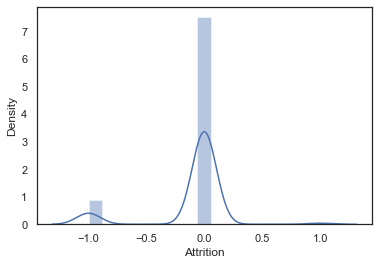

In [268]:
sns.distplot(y_pred_grid-y_test)

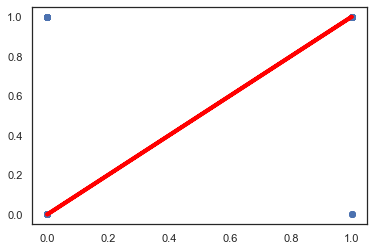

In [269]:
plt.scatter(y_pred_grid,y_test)
plt.plot(y_test,y_test,linewidth=4,color='Red')

# Saving the best Model for Task

In [270]:
joblib.dump(grid_search.best_estimator_,'HR Attrition_Project.obj')

['HR Attrition_Project.obj']

,Y Test,Pred
1041,0,0
184,0,0
1222,1,1
67,0,0
220,0,0


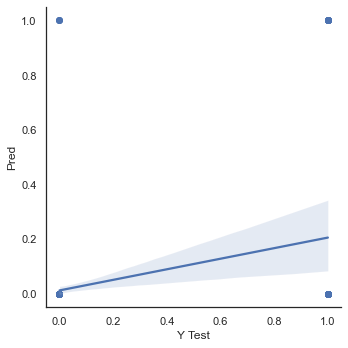

In [271]:
# Comparing the Actual price and predicted price
cmp_data = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred_grid},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=cmp_data,palette='rainbow')
cmp_data.head()

Comparing the 5 different algorithms with default parameter values (before fine-tuning), Logistic Regression has the best accuracy score (88.78%) and the best ROC AUC (76%). 
Out of the  models used for the evaluation, Logistic regression, Decision tree Classifer, random Forest classifier and Extra tree classifier achieved an average score near to 75% on the training data and alos AOC value greater than 70%  indicating a good fit to the training instances.
I picked Logistic regression as the best model with AUC of 0.76% and it will be fine tuned.